In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('../csv/results.csv')

In [45]:
data.head()

,lang,compiler,exec time (s),mem consump (kb),bin size (kb),loc
0,C,gcc v11.1.0,11.3,900,8.8,83
1,C,clang v11.0.0,9.1,340,8.8,83
2,C++,gcc v11.1.0,14.4,1000,9.9,83
3,C++,clang v11.0.0,9.4,340,15.2,83
4,D,dmd v2.097.1,35.7,1300,1200.0,85


In [46]:
data['lang && compiler'] = data['lang'] + ' ' + data['compiler']

In [47]:
data.head(len(data))

,lang,compiler,exec time (s),mem consump (kb),bin size (kb),loc,lang && compiler
0,C,gcc v11.1.0,11.30,900,8.8,83,C gcc v11.1.0
1,C,clang v11.0.0,9.10,340,8.8,83,C clang v11.0.0
2,C++,gcc v11.1.0,14.40,1000,9.9,83,C++ gcc v11.1.0
3,C++,clang v11.0.0,9.40,340,15.2,83,C++ clang v11.0.0
4,D,dmd v2.097.1,35.70,1300,1200.0,85,D dmd v2.097.1
5,D,gdc v11.1.0,125.50,1600,228.8,85,D gdc v11.1.0
6,D,ldc v1.27.0,28.40,1500,6175.0,85,D ldc v1.27.0
7,D libcMath,dmd v2.097.1,25.00,1300,1200.0,85,D libcMath dmd v2.097.1
8,D libcMath,gdc v11.1.0,11.90,1800,228.7,85,D libcMath gdc v11.1.0
9,D libcMath,ldc v1.27.0,12.20,1500,6175.0,85,D libcMath ldc v1.27.0


In [48]:
data = data.drop(data.index[[13, 14, 15, 16, 17, 18]]).reset_index(drop=True)
data

,lang,compiler,exec time (s),mem consump (kb),bin size (kb),loc,lang && compiler
0,C,gcc v11.1.0,11.30,900,8.8,83,C gcc v11.1.0
1,C,clang v11.0.0,9.10,340,8.8,83,C clang v11.0.0
2,C++,gcc v11.1.0,14.40,1000,9.9,83,C++ gcc v11.1.0
3,C++,clang v11.0.0,9.40,340,15.2,83,C++ clang v11.0.0
4,D,dmd v2.097.1,35.70,1300,1200.0,85,D dmd v2.097.1
5,D,gdc v11.1.0,125.50,1600,228.8,85,D gdc v11.1.0
6,D,ldc v1.27.0,28.40,1500,6175.0,85,D ldc v1.27.0
7,D libcMath,dmd v2.097.1,25.00,1300,1200.0,85,D libcMath dmd v2.097.1
8,D libcMath,gdc v11.1.0,11.90,1800,228.7,85,D libcMath gdc v11.1.0
9,D libcMath,ldc v1.27.0,12.20,1500,6175.0,85,D libcMath ldc v1.27.0


In [49]:
data = data.sort_values(ascending=True, by='exec time (s)').reset_index(drop=True)
data.head(len(data))

,lang,compiler,exec time (s),mem consump (kb),bin size (kb),loc,lang && compiler
0,C,clang v11.0.0,9.10,340,8.8,83,C clang v11.0.0
1,C++,clang v11.0.0,9.40,340,15.2,83,C++ clang v11.0.0
2,D betterC,ldc v1.27.0,10.30,340,14.0,90,D betterC ldc v1.27.0
3,D betterC,gdc v11.1.0,10.40,368,10.4,90,D betterC gdc v11.1.0
4,C,gcc v11.1.0,11.30,900,8.8,83,C gcc v11.1.0
5,D libcMath,gdc v11.1.0,11.90,1800,228.7,85,D libcMath gdc v11.1.0
6,D libcMath,ldc v1.27.0,12.20,1500,6175.0,85,D libcMath ldc v1.27.0
7,Rust,rustc v1.51.0,13.00,264,459.8,118,Rust rustc v1.51.0
8,C++,gcc v11.1.0,14.40,1000,9.9,83,C++ gcc v11.1.0
9,D betterC,dmd v2.097.1,21.20,340,10.0,90,D betterC dmd v2.097.1


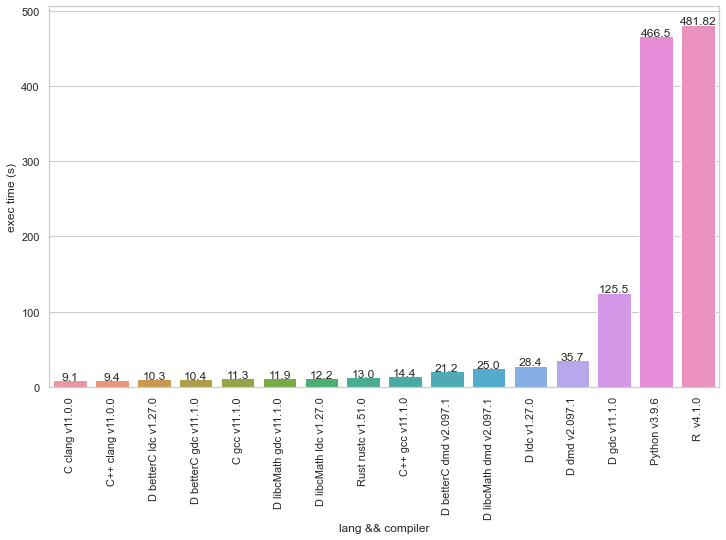

In [50]:
X = data['lang && compiler']
Y = data['exec time (s)']

# setting plot size
fig = plt.figure(figsize = (12, 7))
sns.set_theme(style="whitegrid")

# plotting
sns.barplot(x = X, y = Y)
plt.xticks(rotation = 90)

for i in range(len(Y)):
    plt.text(i, Y[i], Y[i], ha = 'center')

fig.savefig('../plots/exec_time.jpg', bbox_inches = 'tight')

In [51]:
data2 = data.drop(data.index[[14, 15]]).reset_index(drop=True).sort_values(ascending=True, by='mem consump (kb)').reset_index(drop=True)
data2.head(len(data2))

,lang,compiler,exec time (s),mem consump (kb),bin size (kb),loc,lang && compiler
0,Rust,rustc v1.51.0,13.0,264,459.8,118,Rust rustc v1.51.0
1,C,clang v11.0.0,9.1,340,8.8,83,C clang v11.0.0
2,C++,clang v11.0.0,9.4,340,15.2,83,C++ clang v11.0.0
3,D betterC,ldc v1.27.0,10.3,340,14.0,90,D betterC ldc v1.27.0
4,D betterC,dmd v2.097.1,21.2,340,10.0,90,D betterC dmd v2.097.1
5,D betterC,gdc v11.1.0,10.4,368,10.4,90,D betterC gdc v11.1.0
6,C,gcc v11.1.0,11.3,900,8.8,83,C gcc v11.1.0
7,C++,gcc v11.1.0,14.4,1000,9.9,83,C++ gcc v11.1.0
8,D libcMath,dmd v2.097.1,25.0,1300,1200.0,85,D libcMath dmd v2.097.1
9,D,dmd v2.097.1,35.7,1300,1200.0,85,D dmd v2.097.1


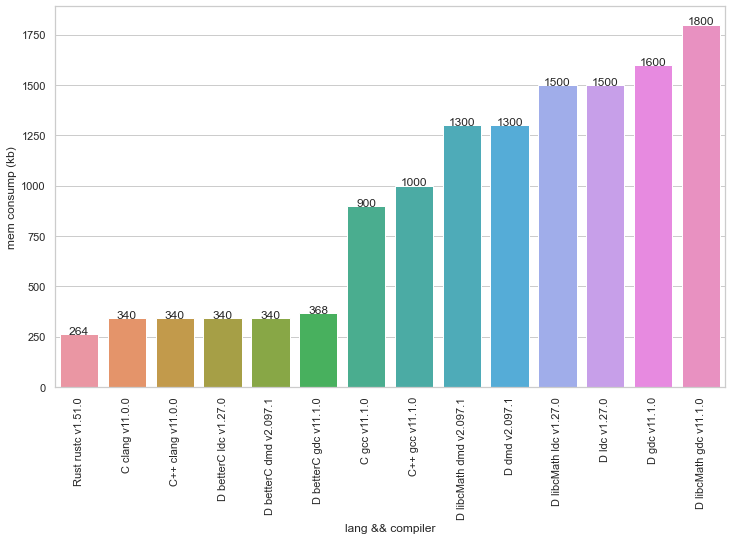

In [52]:
X = data2['lang && compiler']
Y = data2['mem consump (kb)']

# setting plot size
fig = plt.figure(figsize = (12, 7))
sns.set_theme(style="whitegrid")

# plotting
sns.barplot(x = X, y = Y)
plt.xticks(rotation = 90)

for i in range(len(Y)):
    plt.text(i, Y[i], Y[i], ha = 'center')

fig.savefig('../plots/mem_consump.jpg', bbox_inches = 'tight')

In [53]:
data2 = data2.sort_values(ascending=True, by='bin size (kb)').reset_index(drop=True)
data2.head(len(data2))

,lang,compiler,exec time (s),mem consump (kb),bin size (kb),loc,lang && compiler
0,C,clang v11.0.0,9.1,340,8.8,83,C clang v11.0.0
1,C,gcc v11.1.0,11.3,900,8.8,83,C gcc v11.1.0
2,C++,gcc v11.1.0,14.4,1000,9.9,83,C++ gcc v11.1.0
3,D betterC,dmd v2.097.1,21.2,340,10.0,90,D betterC dmd v2.097.1
4,D betterC,gdc v11.1.0,10.4,368,10.4,90,D betterC gdc v11.1.0
5,D betterC,ldc v1.27.0,10.3,340,14.0,90,D betterC ldc v1.27.0
6,C++,clang v11.0.0,9.4,340,15.2,83,C++ clang v11.0.0
7,D libcMath,gdc v11.1.0,11.9,1800,228.7,85,D libcMath gdc v11.1.0
8,D,gdc v11.1.0,125.5,1600,228.8,85,D gdc v11.1.0
9,Rust,rustc v1.51.0,13.0,264,459.8,118,Rust rustc v1.51.0


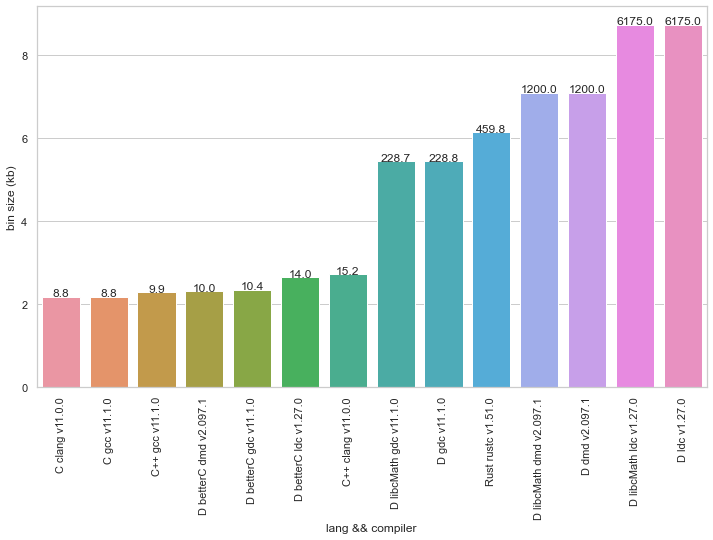

In [54]:
X = data2['lang && compiler']
Y = data2['bin size (kb)']

# setting plot size
fig = plt.figure(figsize = (12, 7))
sns.set_theme(style="whitegrid")

# plotting
sns.barplot(x = X, y = np.log(Y))
plt.xticks(rotation = 90)

for i in range(len(Y)):
    plt.text(i, np.log(Y[i]), Y[i], ha = 'center')

fig.savefig('../plots/bin_size.jpg', bbox_inches = 'tight')

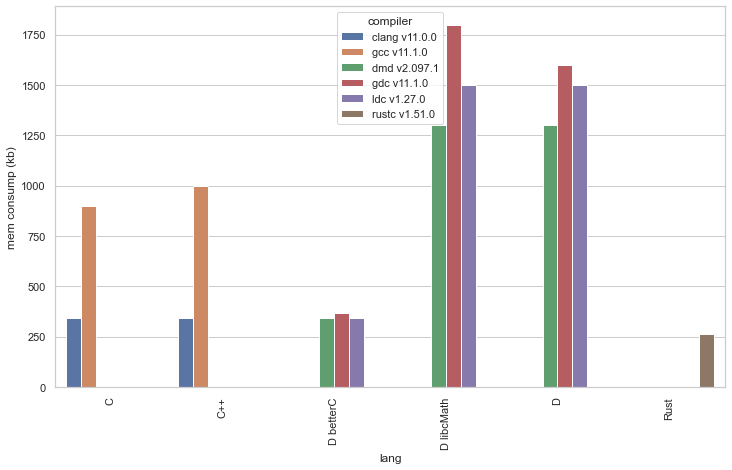

In [55]:
X = data2['lang']
Y = data2['mem consump (kb)']
Z = data2['compiler']

# setting plot size
fig = plt.figure(figsize = (12, 7))
sns.set_theme(style="whitegrid")

# plotting
sns.barplot(x = X, y = Y, hue = Z)
plt.xticks(rotation = 90)

#for i in range(len(Y)):
#    plt.text(i, np.log(Y[i]), Y[i], ha = 'center')

fig.savefig('../plots/mem_consump_compiler-wise.jpg', bbox_inches = 'tight')

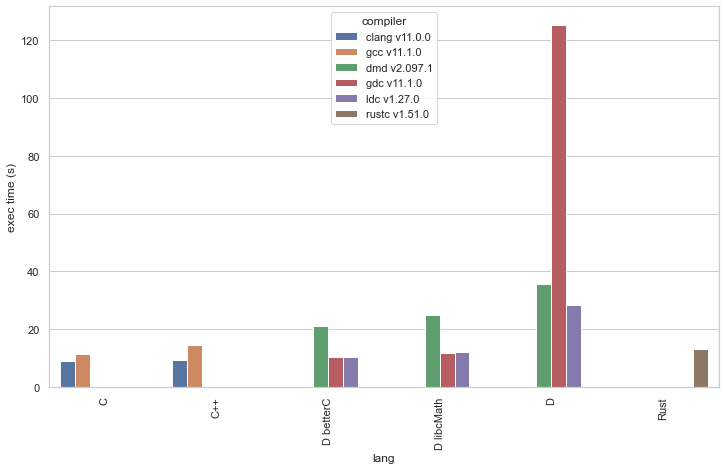

In [56]:
X = data2['lang']
Y = data2['exec time (s)']
Z = data2['compiler']

# setting plot size
fig = plt.figure(figsize = (12, 7))
sns.set_theme(style="whitegrid")

# plotting
sns.barplot(x = X, y = Y, hue = Z)
plt.xticks(rotation = 90)

#for i in range(len(Y)):
#    plt.text(i, np.log(Y[i]), Y[i], ha = 'center')

fig.savefig('../plots/exec_time_compiler-wise.jpg', bbox_inches = 'tight')

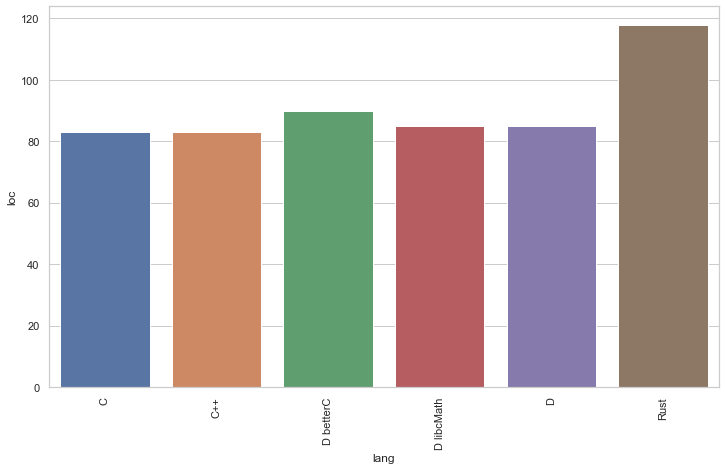

In [58]:
X = data2['lang']
Y = data2['loc']

# setting plot size
fig = plt.figure(figsize = (12, 7))
sns.set_theme(style="whitegrid")

# plotting
sns.barplot(x = X, y = Y)
plt.xticks(rotation = 90)

#for i in range(len(Y)):
#    plt.text(i, np.log(Y[i]), Y[i], ha = 'center')

fig.savefig('../plots/loc.jpg', bbox_inches = 'tight')